In [5]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [7]:
from tensorflow.keras.layers import Input,SimpleRNN,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD,Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# CheatSheet
# N = Number of samples (batch size)
# T = sequence lenght (time dimension)
# D = number of input featues 
# Input: N x T x D

# M = number of hidden units/ neurons
# K = number of output units in Dense layer/ classes
# Output (for many to many) : N x T x M
# Output (for many to one): N x M

# K > 2 does NOT mean a classification problem. Could still be regression of multiple features

In [57]:
# make data
N = 2
T = 10
D = 3
K = 2
X = np.random.randn(N,T,D)
 

In [ ]:
# Simpe RNN
M = 5  
i = Input(shape=(T,D))
x = SimpleRNN(M)(i)
x = Dense(K)(x)
model = Model(i,x)
model.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 10, 3)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_9 (SimpleRNN)        │ (None, 5)              │            45 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57 (228.00 B)

 Trainable params: 57 (228.00 B)

 Non-trainable params: 0 (0.00 B)

In [59]:
Yhat = model.predict(X)
print(Yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
[[0.01068678 0.5898776 ]
 [0.38845626 0.57434094]]


In [60]:
a,b,c = model.layers[1].get_weights()
print(a.shape,b.shape,c.shape)


(3, 5) (5, 5) (5,)


In [ ]:
Wx,Wh,bh =  model.layers[1].get_weights()
Wo,bo= model.layers[2].get_weights()

h_last = np.zeros(M) # initial hidden state
 # the one and only sample
Yhats = [] # Storing outputs
Yhats_last = []

for n in range(N):
    x = X[n]
    for t in range(T):
        h = np.tanh(x[t].dot(Wx)+h_last.dot(Wh)+bh) # Hidden state calculation
        y = h.dot(Wo) + bo # Output calculation
        Yhats.append(y)  # Store output
        
        h_last = h # Update the hidden state
    
    Yhats_last.append(Yhats[-1])


print(Yhats_last)

Yhat = model.predict(X)
print(Yhat)




[array([0.01068675, 0.58987765]), array([0.38900961, 0.58757815])]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[[0.01068678 0.5898776 ]
 [0.38845626 0.57434094]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


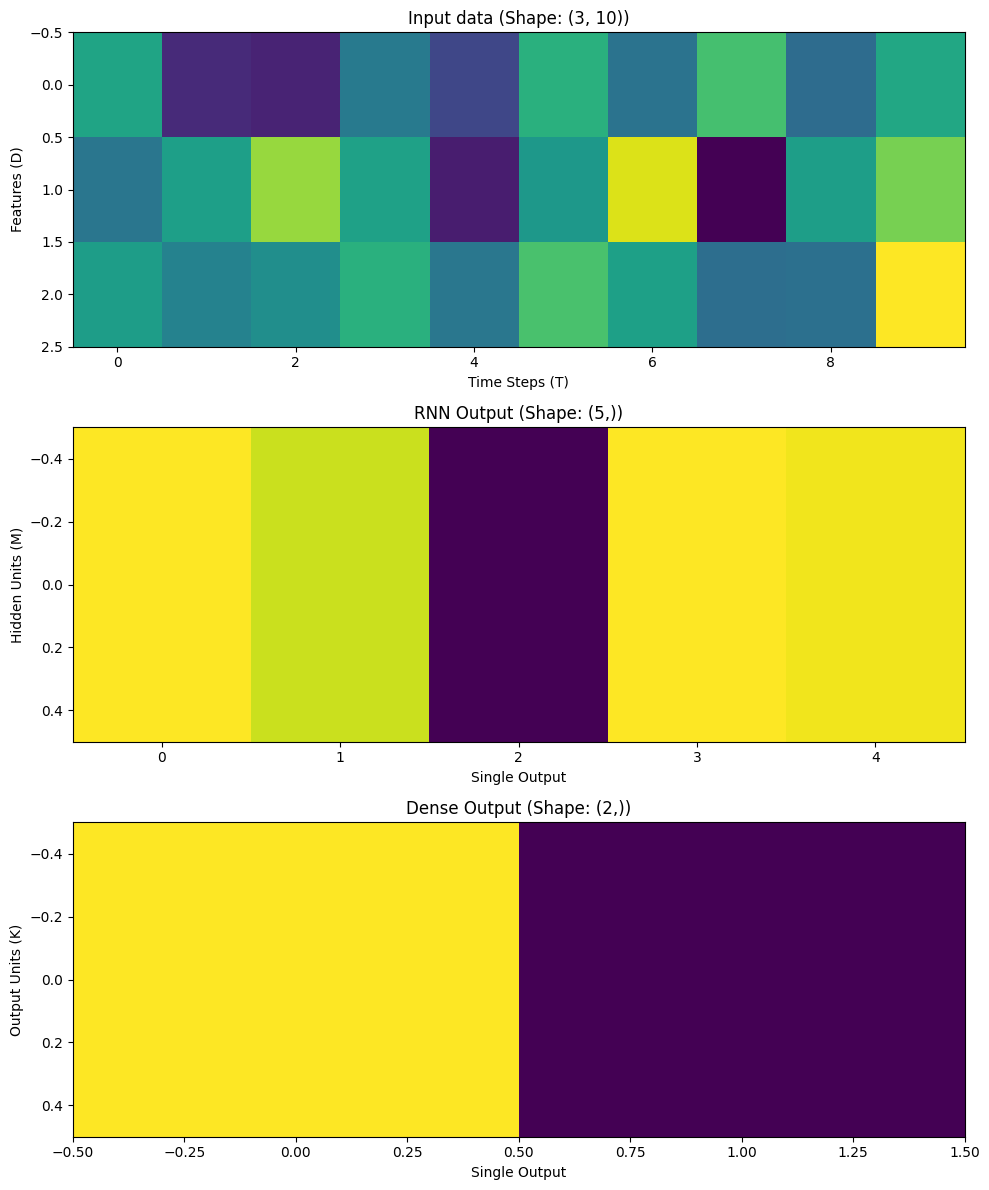

In [ ]:
# Generate some example data
example_data = np.random.randn(N, T, D)  # Shape: (N, T, D)

# Define the model
input_layer = Input(shape=(T, D))
x = SimpleRNN(M, return_sequences=False)(input_layer)
output_layer = Dense(K)(x)
model = Model(inputs=input_layer, outputs=output_layer)

# Forward pass the data to get intermediate outputs
intermediate_layer_model = Model(inputs=model.input, outputs=[input_layer, x, output_layer])
input_data, rnn_output, dense_output = intermediate_layer_model.predict(example_data)

# Plot each transformation
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# Plot input data (N, T, D)
axes[0].imshow(example_data[0].T, aspect='auto', cmap='viridis')
axes[0].set_title(f"Input data (Shape: {example_data[0].T.shape})")
axes[0].set_ylabel("Features (D)")
axes[0].set_xlabel("Time Steps (T)")

# Plot RNN layer output (N, M)
axes[1].imshow(rnn_output[0].reshape(1, -1), aspect='auto', cmap='viridis')
axes[1].set_title(f"RNN Output (Shape: {rnn_output[0].shape})")
axes[1].set_ylabel("Hidden Units (M)")
axes[1].set_xlabel("Single Output")

# Plot Dense layer output (N, K)
axes[2].imshow(dense_output[0].reshape(1, -1), aspect='auto', cmap='viridis')
axes[2].set_title(f"Dense Output (Shape: {dense_output[0].shape})")
axes[2].set_ylabel("Output Units (K)")
axes[2].set_xlabel("Single Output")

plt.tight_layout()
plt.show()
